In [40]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import house_sales_data as hsd
from sklearn.model_selection import train_test_split


In [41]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
area = data["area"]
beds = data["beds"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [42]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    # now complete ...
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] += 1/m*2*(yhat-y[i])**2
            for j in range(n):
                grad[j] += 1/m*2*(yhat-y[i])*X[i,j]
        theta -= learning_rate*grad
        
    return theta,costs
    


In [43]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols]-min_X)/(max_X-min_X)
    y[:] = (y-min_y)/(max_y-min_y)
    
    return X,y,min_X,max_X,min_y,max_y
    

In [ ]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    pass

In [44]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# call gradient descent and fine-tune your learning rate
theta,costs=gradient_descent(X,y,150,1.0)
print(theta)
print(costs)

[-2.57122209e+28 -4.08450463e+28 -8.83843955e+28]
[2.06518171e-01 4.32768147e-01 9.98780455e-01 2.40759323e+00
 5.90798160e+00 1.45998510e+01 3.61781559e+01 8.97441286e+01
 2.22712788e+02 5.52782441e+02 1.37211553e+03 3.40594670e+03
 8.45452537e+03 2.09866093e+04 5.20949926e+04 1.29315309e+05
 3.20999243e+05 7.96816125e+05 1.97793601e+06 4.90982899e+06
 1.21876647e+07 3.02534307e+07 7.50980677e+07 1.86415876e+08
 4.62739985e+08 1.14865911e+09 2.85131563e+09 7.07781860e+09
 1.75692637e+10 4.36121698e+10 1.08258456e+11 2.68729881e+11
 6.67067979e+11 1.65586233e+12 4.11034580e+12 1.02031082e+13
 2.53271677e+13 6.28696090e+13 1.56061182e+14 3.87390553e+14
 9.61619273e+14 2.38702678e+15 5.92531475e+15 1.47084043e+16
 3.65106606e+16 9.06303849e+16 2.24971735e+17 5.58447165e+17
 1.38623297e+18 3.44104504e+18 8.54170346e+18 2.12030640e+19
 5.26323494e+19 1.30649241e+20 3.24310510e+20 8.05035730e+20
 1.99833957e+21 4.96047679e+21 1.23133877e+22 3.05655129e+22
 7.58727494e+22 1.88338868e+23 4.67

Text(0, 0.5, 'iterations')

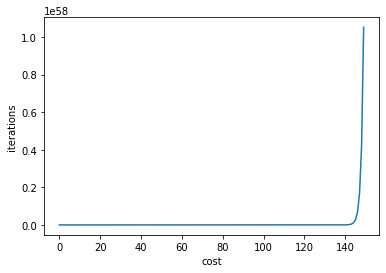

In [54]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations

iteration = np.arange(0,150)
plt.plot(iteration,costs)
plt.xlabel('cost')
plt.ylabel('iterations')


In [ ]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

In [57]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [59]:
# Create linear regression object

newmodel = LinearRegression(fit_intercept = True)

In [64]:
# Train the model using the training sets
X=np.array([area,beds])
y=price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

newmodel.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 774]

In [ ]:
# Predict on test set and print evaluation metric
# How much does it differ by from 